In [1]:
!nvidia-smi

Thu Dec 18 04:21:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.2 MB/s eta 0:00:00


In [3]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fwUmnyRPCwz4KDuRKJOe")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(15)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-15 in yolov11:: 100%|██████████| 756/756 [00:00<00:00, 7739.74it/s]


In [5]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

In [6]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    data=/content/football-players-detection-15/data.yaml \
    batch=6 \
    epochs=350 \
    imgsz=1280 \
    plots=True \
    patience=0


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-15/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=350, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0,

In [7]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

from google.colab import files
files.download('/content/runs/detect/train/weights/last.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/football-players-detection-15/data.yaml imgsz=1280

# epochs 350

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2199.7±414.5 MB/s, size: 58.8 KB)
val: Scanning /content/football-players-detection-15/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 859.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.6s/it 6.3s
                   all         49       1174      0.895      0.889      0.912       0.62
                  ball         45         45      0.785      0.667      0.724      0.306
            goalkeeper         38         39      0.839      0.938      0.948      0.686
                player         49        973      0.971      0.988      0.994      0.796
               referee         49        117      0.983      0.963       0.98      0.691
Speed: 37.9ms preprocess, 43.

✔️ Yes
👉 last.pt = epoch 266 model

👉 best.pt = epoch 166 model

In [9]:

import pandas as pd

df = pd.read_csv("/content/runs/detect/train/results.csv")

best_epoch = df["metrics/mAP50-95(B)"].idxmax()
df.loc[best_epoch]

,328
epoch,329.00000
time,7455.88000
train/box_loss,0.50382
train/cls_loss,0.27702
train/dfl_loss,0.79766
metrics/precision(B),0.89409
metrics/recall(B),0.88926
metrics/mAP50(B),0.91198
metrics/mAP50-95(B),0.62140
val/box_loss,0.92400


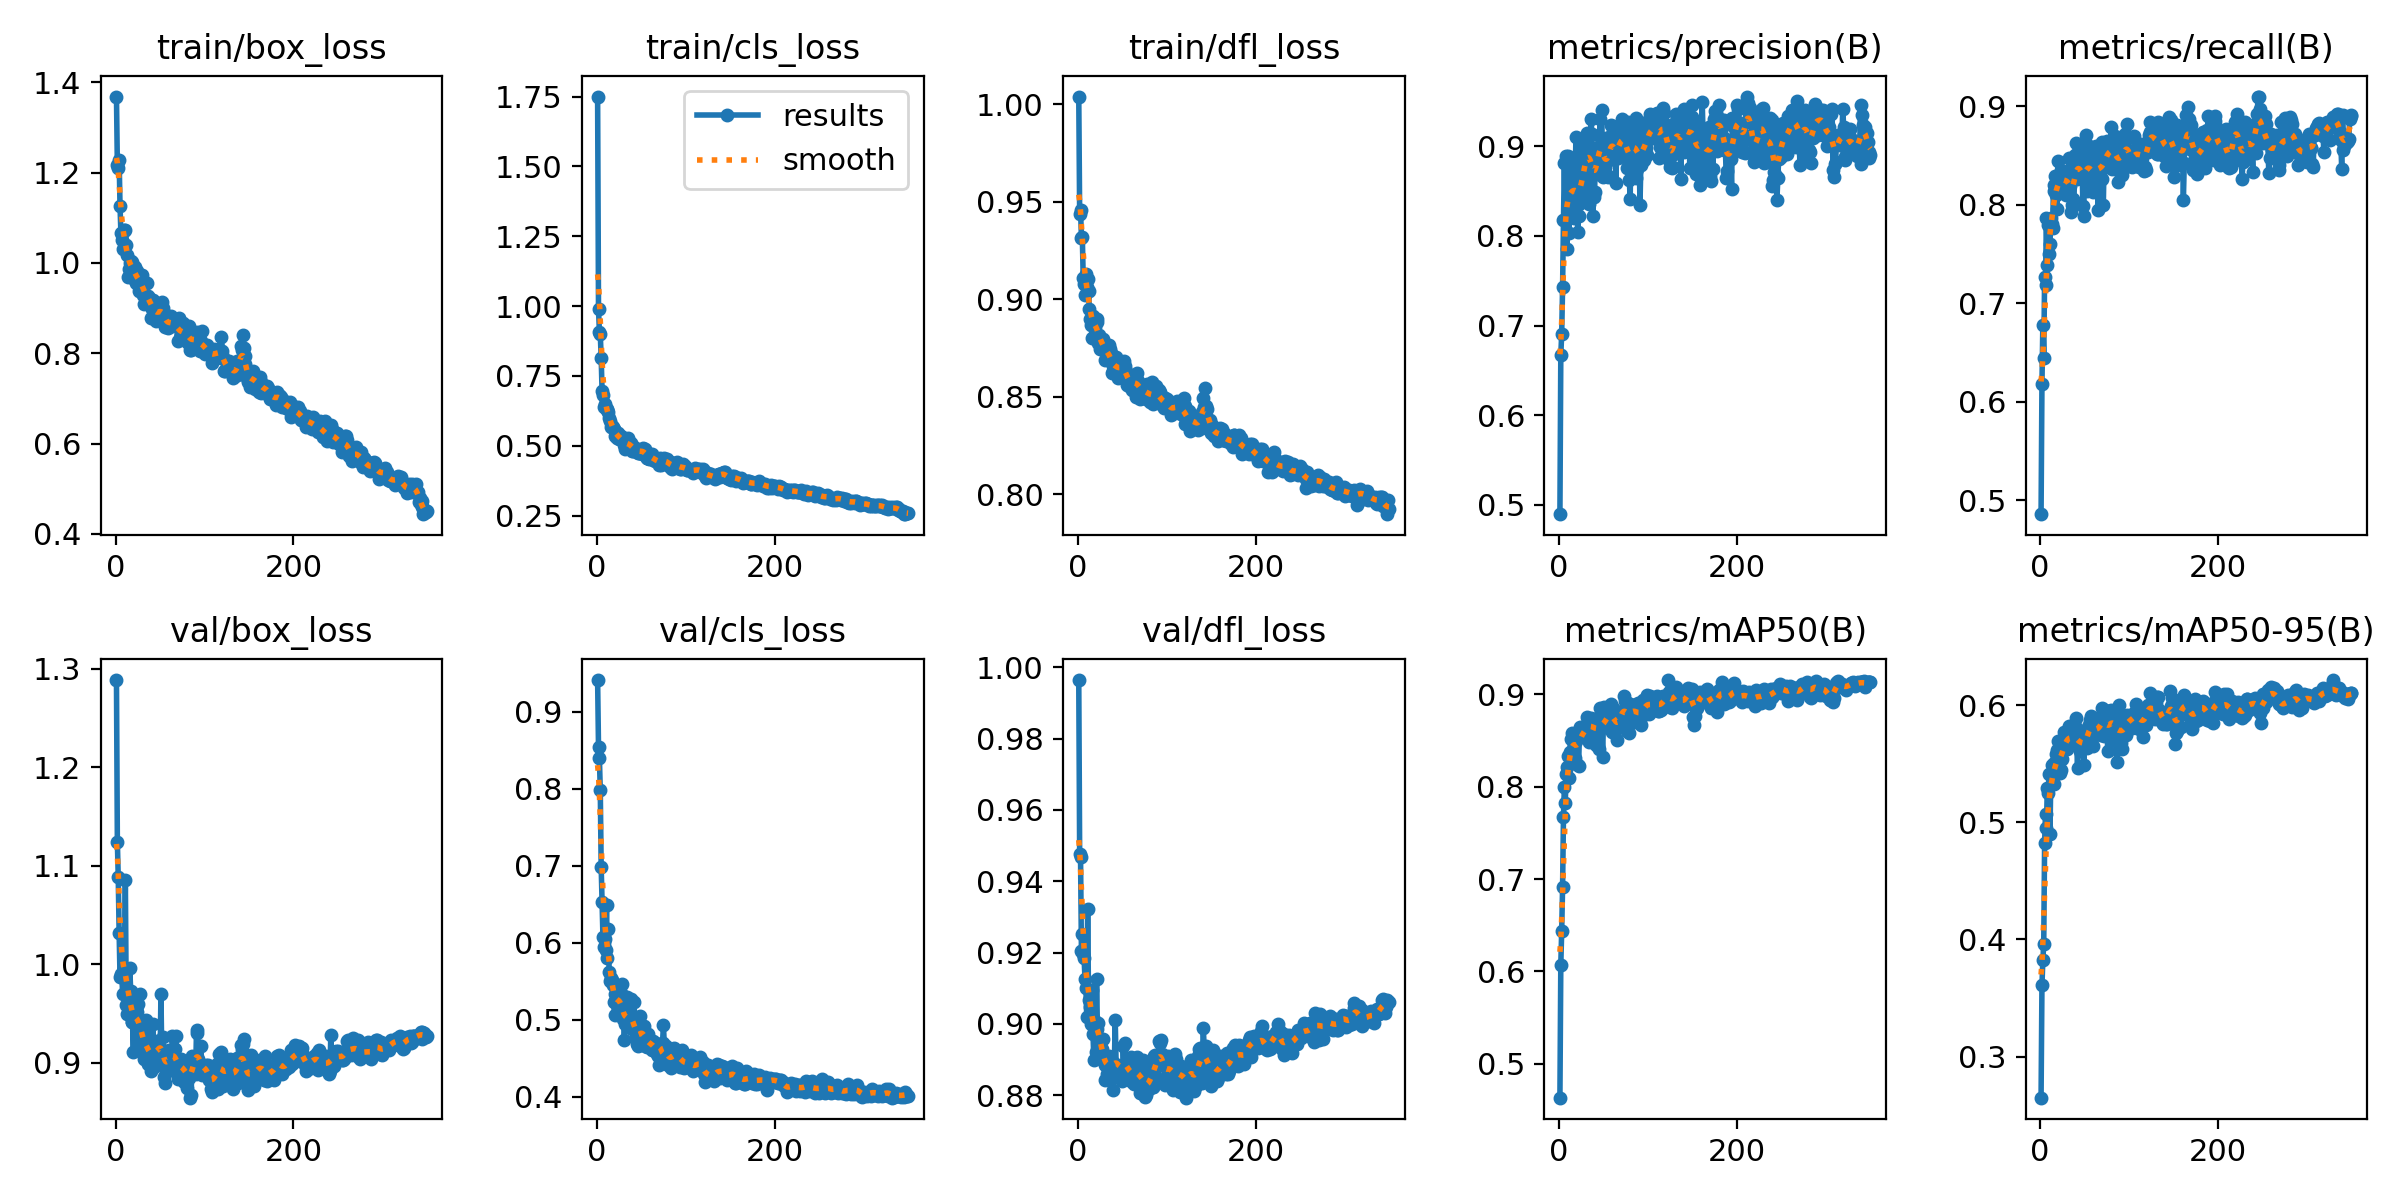

In [10]:

from IPython.display import Image, display

display(Image(filename="/content/runs/detect/train/results.png"))


In [ ]:
!yolo task=detect mode=train \
model=/content/runs/detect/train/weights/last.pt \
data=/content/football-players-detection-15/data.yaml \
epochs=100 \
batch=6 \
imgsz=1280



patience==0
Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-15/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ov

In [ ]:
import pandas as pd

df = pd.read_csv("/content/runs/detect/train/results.csv")

best_epoch = df["metrics/mAP50-95(B)"].idxmax()
df.loc[best_epoch]

,165
epoch,166.000000
time,3302.620000
train/box_loss,0.861510
train/cls_loss,0.452490
train/dfl_loss,0.849930
metrics/precision(B),0.930820
metrics/recall(B),0.824900
metrics/mAP50(B),0.874640
metrics/mAP50-95(B),0.595560
val/box_loss,0.889350


In [ ]:
!yolo task=detect mode=train \
model=/content/runs/detect/train3/weights/last.pt \
data=/content/football-players-detection-15/data.yaml \
epochs=100 \
batch=6 \
imgsz=1280

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-15/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train3/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

In [ ]:
# !yolo task=detect mode=train \
# model=/content/runs/detect/train/weights/best.pt \
# data=/content/football-players-detection-15/data.yaml \
# epochs=50 \
# batch=6 \
# imgsz=1280


# 📌 Training Started at first, But strong weights.


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/football-players-detection-15/data.yaml imgsz=1280

# 150 epochs

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1922.5±398.1 MB/s, size: 63.1 KB)
val: Scanning /content/football-players-detection-15/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 905.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.5s/it 5.9s
                   all         49       1174       0.91      0.752      0.834      0.566
                  ball         45         45          1      0.278      0.505      0.241
            goalkeeper         38         39      0.858      0.872      0.932      0.679
                player         49        973      0.951      0.969      0.989      0.756
               referee         49        117      0.831      0.889       0.91      0.587
Speed: 44.0ms preprocess, 28

In [ ]:
Tanvir Ahmed

In [ ]:
! pip install ultralytics supervision inference tqdm


In [ ]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"


Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:01<00:00, 17.6MB/s]


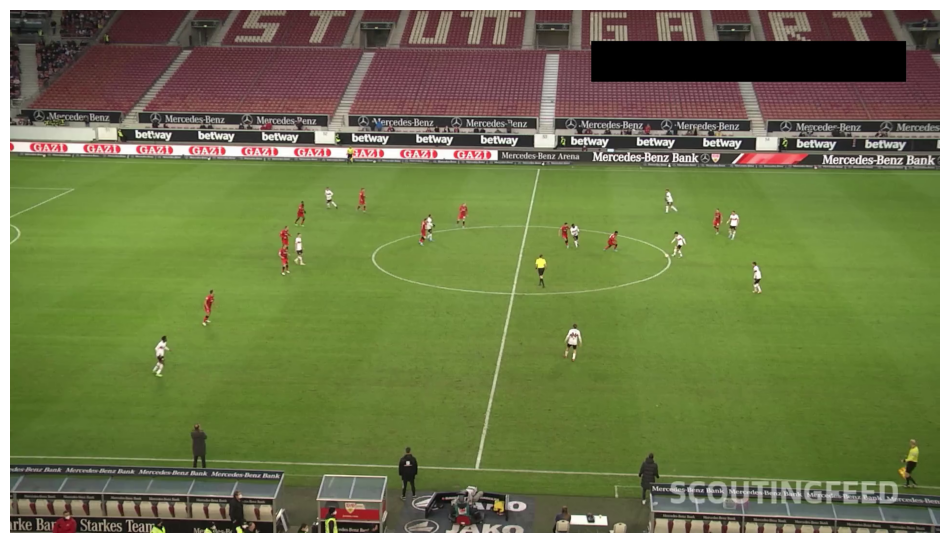

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/0bfacc_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [ ]:
from inference import get_model
from google.colab import userdata

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key='fwUmnyRPCwz4KDuRKJOe')

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!nvidia-smi

Mon Dec 15 17:27:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import supervision as sv
from tqdm import tqdm
import torch

# -----------------------------
# CHECK GPU
# -----------------------------
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))

# -----------------------------
# PATHS
# -----------------------------
SOURCE_VIDEO_PATH = "/content/0bfacc_0.mp4"
TARGET_VIDEO_PATH = "/content/annotated_output_video1.mp4"

# -----------------------------
# LOAD MODEL (GPU ENABLED)
# -----------------------------

PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"

PLAYER_DETECTION_MODEL = get_model(
    model_id=PLAYER_DETECTION_MODEL_ID,
    api_key='fwUmnyRPCwz4KDuRKJOe',
    device="cuda"   # ⭐ VERY IMPORTANT
)

# -----------------------------
# ANNOTATORS
# -----------------------------
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(
        ['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']
    ),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(
        ['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']
    ),
    text_color=sv.Color.from_hex('#000000')
)

# -----------------------------
# VIDEO SETUP
# -----------------------------
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(
    TARGET_VIDEO_PATH,
    video_info=video_info
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# -----------------------------
# PROCESS VIDEO (GPU INFERENCE)
# -----------------------------
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

        # 🔥 GPU inference happens here
        result = PLAYER_DETECTION_MODEL.infer(
            frame,
            confidence=0.3,device="cuda"
        )[0]

        detections = sv.Detections.from_inference(result)

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]

        annotated_frame = frame.copy()

        annotated_frame = box_annotator.annotate(
            scene=annotated_frame,
            detections=detections
        )

        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=detections,
            labels=labels
        )

        video_sink.write_frame(annotated_frame)

print("✅ Video processing complete!")


CUDA Available: True
GPU Name: Tesla T4


  1%|          | 5/750 [00:50<2:06:43, 10.21s/it]

In [ ]:
print("Tanvir ahmed and some people work hard and include the topic and chapter")